## Regresión lineal

Esta es una breve introducción a la lógica de la construcción de un  modelo estadístico utilizado en machine learning.

In [1]:
# Librerias
import pandas as pd
from sklearn import linear_model
import random
import numpy as np
%matplotlib inline

In [2]:
# Leemos los datos

bikes = pd.read_csv('bikeshare.csv')

In [3]:
# Exploramos la data
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# "count" es un metodo, por lo que cambiamos el nombre 
bikes.rename(columns={'count':'total'}, inplace=True)


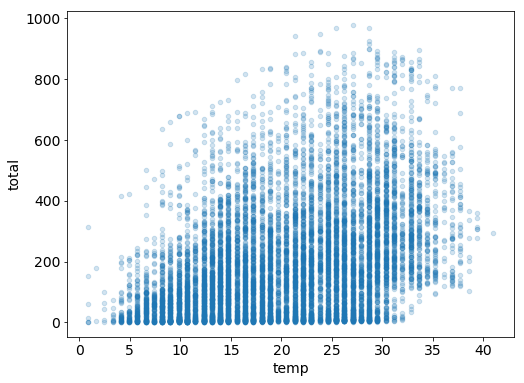

In [7]:
# Visualizamos la data

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
# diagrama de dispersion de pandas
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)

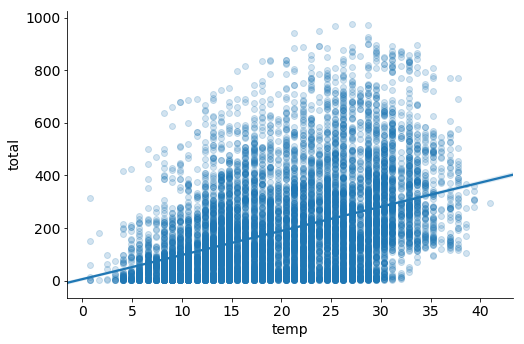

In [8]:
# Diagrama de dispersion con regresion lineal
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

### Construyendo un modelo lineal


In [11]:
# Creamos un X e y
cols_caracteristicas = ['temp']
X = bikes[cols_caracteristicas]
y = bikes.total

In [12]:
# Ajustamos el modelo 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Imprimimos los coeficientes
print (linreg.intercept_)
print (linreg.coef_)

6.04621295961681
[9.17054048]


### Usamos el modelo para hacer predicciones

In [14]:
# de modo manual
linreg.intercept_ + linreg.coef_*25

array([235.309725])

In [15]:
# con el metodo predict
linreg.predict(25)

array([235.309725])

### Escalado de las características importantes

In [16]:
# Creamos una nueva columna temp_F
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


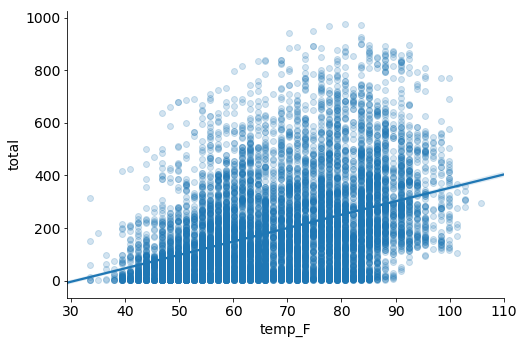

In [17]:
# Diagrama de dispersion de seaborn con regresion lineal
sns.lmplot(x='temp_F', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})


In [18]:
# creamos  X e y
cols_caracteristicas = ['temp_F']
X = bikes[cols_caracteristicas]
y = bikes.total

# instanciamos y fijamos
linreg = LinearRegression()
linreg.fit(X, y)

# imprimimos los coeficientes
print (linreg.intercept_)
print (linreg.coef_)

-156.98561782129428
[5.09474471]


In [19]:
# Convertimos 25 grados Celsius a Fahrenheit
25 * 1.8 + 32

77.0

In [20]:
# prediccion de alquileres 77 grados Fahrenheit
linreg.predict(77)

array([235.309725])

Conclusión: la escala de las características es irrelevante para los modelos de regresión lineal. Al cambiar la escala, simplemente cambiamos nuestra interpretación de los coeficientes.

In [21]:
# removemos temp_F
bikes.drop('temp_F', axis=1, inplace=True)

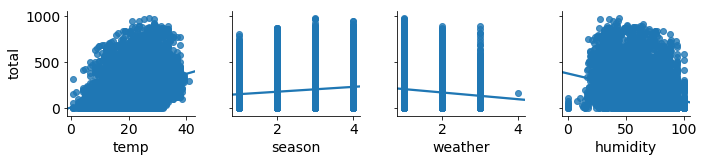

In [24]:
# Mas visualizacion
cols_caracteristicas = ['temp', 'season', 'weather', 'humidity']
sns.pairplot(bikes, x_vars=cols_caracteristicas, y_vars='total', kind='reg')


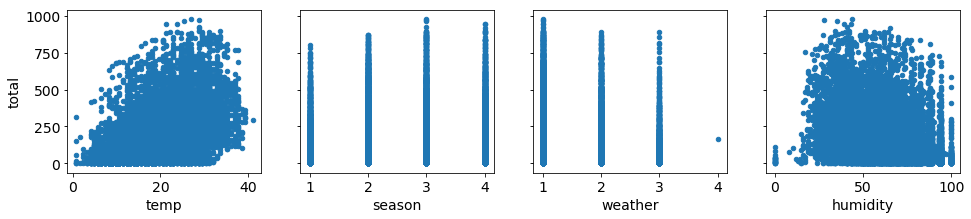

In [25]:
# multiples diagramas de dispersion en pandas
fig, axs = plt.subplots(1, len(cols_caracteristicas), sharey=True)
for index, feature in enumerate(cols_caracteristicas):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

In [27]:
# matriz de correlacion (rangos desde 1 a -1)
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


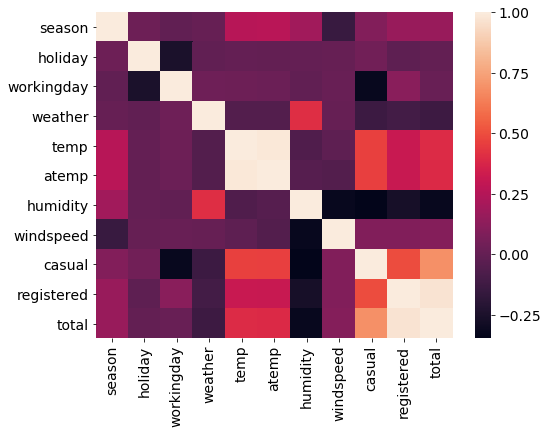

In [30]:
# mapa de calor

sns.heatmap(bikes.corr())

### Agregando más características al modelo

In [29]:
# Lista de caracteristicas
cols_caracteristicas = ['temp', 'season', 'weather', 'humidity']


In [31]:
X = bikes[cols_caracteristicas]
y = bikes.total

# instanciamos y fijamos
linreg = LinearRegression()
linreg.fit(X, y)

# imprimimos los coeficientes
print (linreg.intercept_)
print (linreg.coef_)

159.52068786129772
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [39]:
# Emparejamos los nombres de las características con los coeficientes
zipped = zip(cols_caracteristicas, linreg.coef_)
list(zipped)

[('temp', 7.864824992477442),
 ('season', 22.53875753246678),
 ('weather', 6.670302035923743),
 ('humidity', -3.1188733823964956)]

### Interpretación de coeficientes

* Manteniendo todas las demás características fijas, un aumento de 1 unidad en la temperatura se asocia con un aumento en el alquiler de 7.86 bicicletas.
* Manteniendo todas las demás características fijas, un aumento de 1 unidad en la temporada se asocia con un aumento en el alquiler de 22.5 bicicletas.

* Manteniendo todas las demás características fija, un aumento de 1 unidad en el clima está asociado con un aumento en el alquiler de 6.67 bicicletas.

* Manteniendo todas las demás características fijas, un aumento de 1 unidad en la humedad se asocia con una disminución en el alquiler de 3.12 bicicletas.

### Comparando modelos con la división entrenamiento-prueba y RMSE

In [43]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# definimos  una  funcion que acepta una lista de caracteristicas y retorna un RMSE de prueba
def entrenamiento_prueba_rmse(cols_caracteristicas):
    X = bikes[cols_caracteristicas]
    y = bikes.total
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_entrenamiento, y_entrenamiento)
    y_pred = linreg.predict(X_prueba)
    return np.sqrt(metrics.mean_squared_error(y_prueba, y_pred))

In [45]:
# comparamos  diferentes conjuntos de caracteristicas
print (entrenamiento_prueba_rmse(['temp', 'season', 'weather', 'humidity']))
print (entrenamiento_prueba_rmse(['temp', 'season', 'weather']))
print (entrenamiento_prueba_rmse(['temp', 'season', 'humidity']))

155.64945913079674
164.1653997629182
155.59818936691417
